# Predição dos preços de casas em Melbourn, Austrália

# Introdução

Como estamos vivendo um período economicamente fragilizado com a pandemia do Novo Coronavirus, um pensamento importante surgiu na cabeça de muitos investidores brasileiros, bem como pessoas comuns a procura de uma moradia fixa.

Partindo desse pressuposto, o trabalho a seguir desenvolve um método para a criação de um modelo de predição do preço de casas em Melbourn que, utilizando as devidas modificações, poderá facilmente ser utilizado para a predição de preços de casas aqui no Brasil.

## Funções auxiliares

In [1]:
# Função para imprimir os gráficos de treinamento
def plotHistory(history, title):

  fig, ax = plt.subplots(1,2,figsize=(26,10))

  # Imprime a curva de aprendizado
  ax[0].set_title('Mean Absolute Percentage Error', pad=-40)
  ax[0].plot(history.history['loss'], label='train')
  ax[0].plot(history.history['val_loss'], label='valid')
  ax[0].legend(loc='best')

  # Imprime a curva de acurácia
  ax[1].set_title('Mean Absolute Error', pad=-40)
  ax[1].plot(history.history['mae'], label='train')
  ax[1].plot(history.history['val_mae'], label='valid')
  ax[1].legend(loc='best')

  fig.suptitle(title)

  #fig.savefig('/content/gdrive/MyDrive/Engenharia Elétrica/Deep Learning/' + title)
  #plt.show()

## Sobre o Dataset

O dataset escolhido pelo grupo foi retirado de um dos sites mais famosos de Machine Learning, o Kaggle. Nessa seção, iremos estudar um pouco mais sobre o nosso dataset.

In [2]:
# Conectando ao Google Drive
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Retirando o zip do arquivo
import zipfile

#PATH = '/content/gdrive/MyDrive/Engenharia Elétrica/Deep Learning/price_house_prediction.zip'
PATH = 'C:/Users/Avell/Documents/IA/Redes/Regressão/fine-tuning-house-price-main/fine-tuning-house-price-main/price_house_prediction.zip'
# Cria uma stream de leitura ao arquivo do dataset
zp = zipfile.ZipFile(file=PATH, mode='r')
# Extrai os arquivos na pasta atual
zp.extractall('./')
# Fecha a stream
zp.close()

In [4]:
import pandas as pd
import numpy as np

# Importando o dataset
data = pd.read_csv('Melbourne_housing_FULL.csv')
data.head().transpose()
#data.head()

,0,1,2,3,4
Suburb,Abbotsford,Abbotsford,Abbotsford,Abbotsford,Abbotsford
Address,68 Studley St,85 Turner St,25 Bloomburg St,18/659 Victoria St,5 Charles St
Rooms,2,2,2,3,3
Type,h,h,h,u,h
Price,NaN,1480000.0,1035000.0,NaN,1465000.0
Method,SS,S,S,VB,SP
SellerG,Jellis,Biggin,Biggin,Rounds,Biggin
Date,3/09/2016,3/12/2016,4/02/2016,4/02/2016,4/03/2017
Distance,2.5,2.5,2.5,2.5,2.5
Postcode,3067.0,3067.0,3067.0,3067.0,3067.0


Logo de cara podemos perceber que o dataset possui muitas colunas. Bem como a maioria delas possuem dados Categóricos, tais como o "Adress", "Type", "Method", "CouncilArea", entre outros.

Além disso, é possível observar que existem dados numéricos muito discrepantes entre si, como é o caso entre "Rooms" e "Price" ou "LandSize" e "Car".

Para piorar ainda mais a situação, logo nas primeiras linhas do dataset já podemos perceber que muitos dos valores, provavelmente importantes, estão faltando, como é o caso do "BuildingArea" e "YearBuilt".

Ademais, a fim de conhecermos um pouco mais o nosso dataset vamos explorar algumas funcionalidades que a biblioteca do Pandas e do Numpy nos oferece.

In [5]:
# Analisando estatísticas do nosso Dataset
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


###Analisando a Correlação de Pearson e de Spearman

A Correlação de Pearson é uma métrica muito utilizada para saber o quanto que uma variável numérica interfere ou é inteferida por outra variável de forma linear. E quanto que a correlação de Spearman é utilizada para casos não lineares.

In [6]:
# Correlação de Pearson
pearson = data.corr(method='pearson')
# Correlação de Spearman
spearman = data.corr(method='spearman')

In [7]:
import numpy as np
# Criando a máscaras para os Heatmapa da correlações
mask_pearson = np.triu(np.ones_like(pearson, dtype=bool))
mask_spearman = np.triu(np.ones_like(spearman, dtype=bool))

C:\Users\Avell\AppData\Local\Temp\ipykernel_10848\2799056870.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


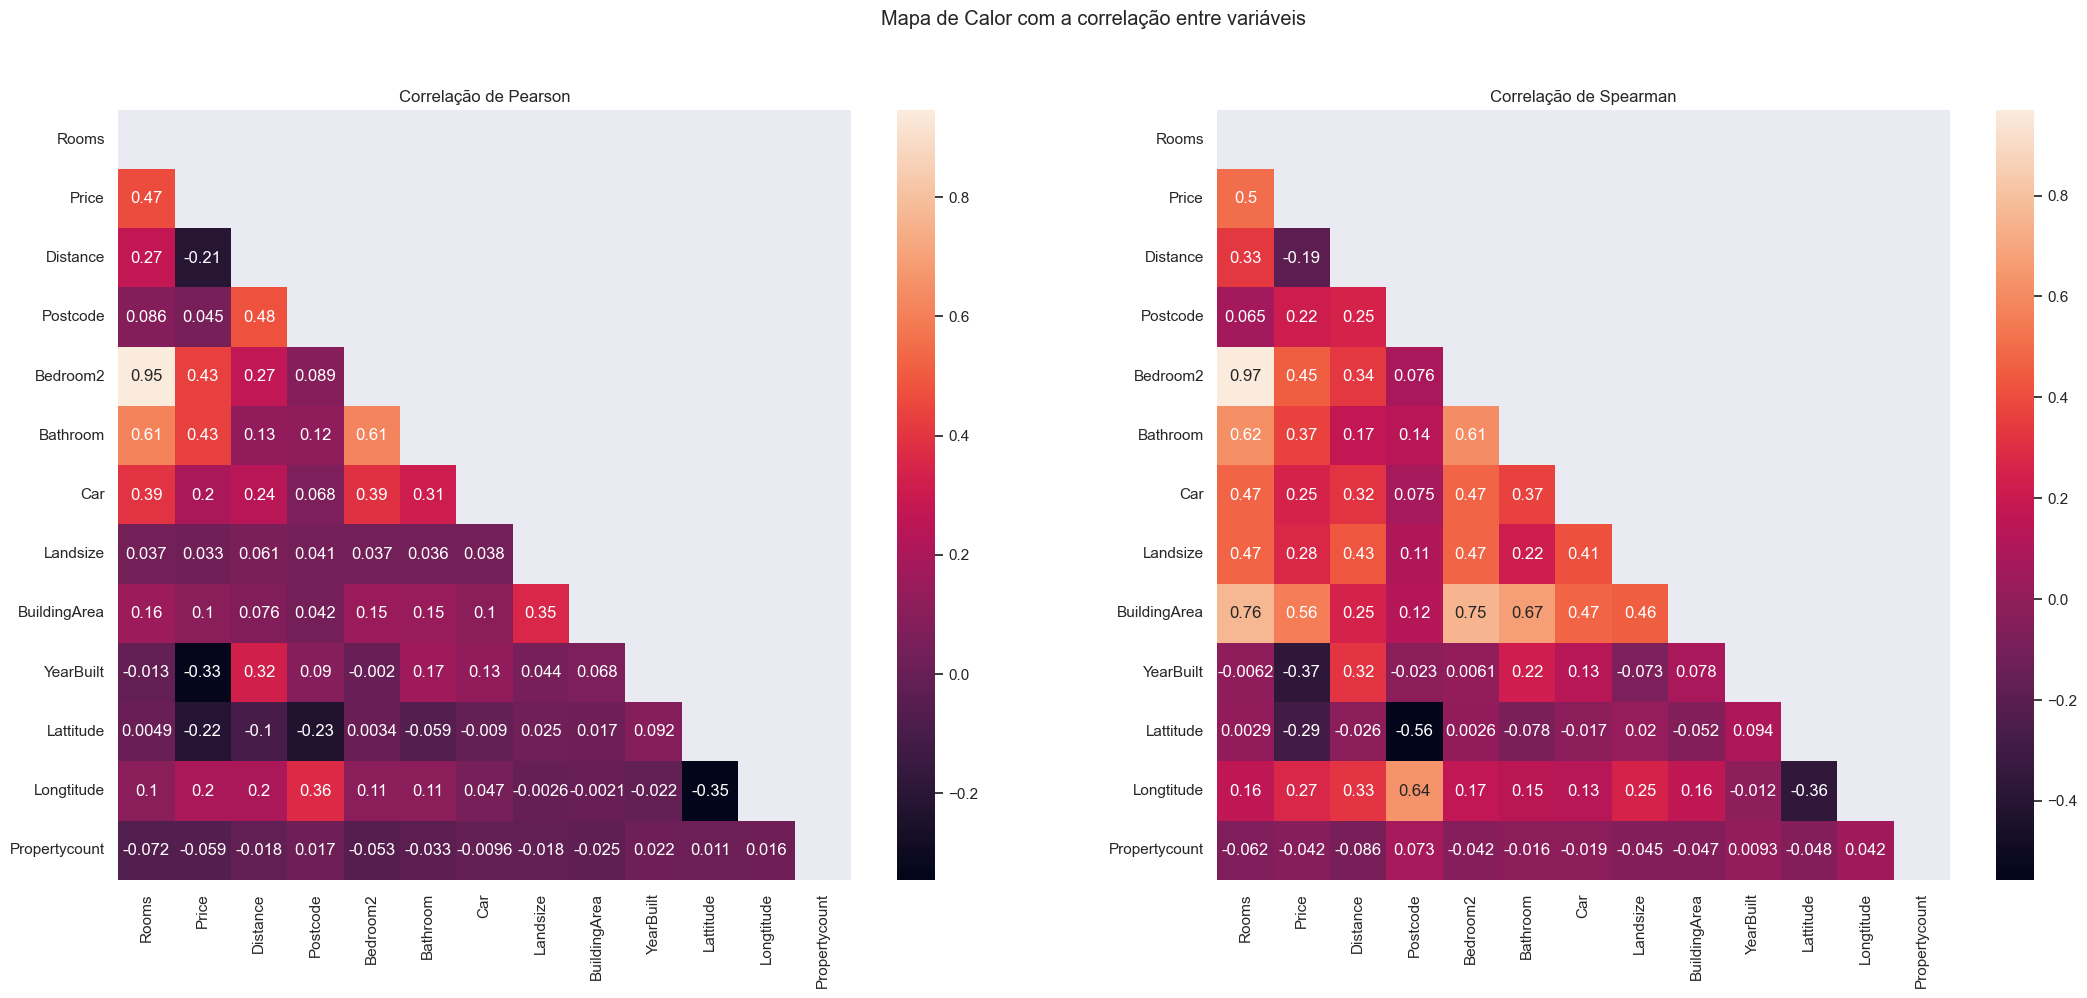

In [8]:
#Imprimindo o heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')

fig, ax = plt.subplots(1,2,figsize=(26,10))
sns.heatmap(data=pearson, annot=True, mask=mask_pearson, ax=ax[0])
ax[0].set_title("Correlação de Pearson")
sns.heatmap(data=spearman, annot=True, mask=mask_spearman, ax=ax[1])
ax[1].set_title("Correlação de Spearman")
fig.suptitle('Mapa de Calor com a correlação entre variáveis')
fig.show()

Através da análise do mapa de calor, podemos perceber que os preços das casas possuem 43% de correlação com a quantidade de banheiros e quartos na casa. Bem como possui uma forte correlação não linear com a área construída.

## Pré-processamento do dataset

In [9]:
# Relembrando o nosso dataset
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [12]:
#Copiando o dataset
data_cp = data.copy()
len(data_cp)

34857

### Tratamento de Valores Faltantes

É imprescindível que os dados fornecidos ao nosso modelo não sejam faltantes pois, caso isso aconteça, é possível haver erros tanto no treinamento do modelo quanto, a nível de compilação, quanto no aprendizado do mesmo.

Para tanto, faz-se necessário adotarmos técnicas para lidar com esses dados faltantes. Para esse notebook, vamos utilizar duas delas:

*   Deletar os valores vazios;
*   Preencher os valores vazios com suas respectivas médias;



In [13]:
#Procurando por valores vazios
data_cp.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [14]:
data_cp.loc[data_cp["Bedroom2"].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
19,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
21,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,10/12/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
22,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,10/12/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34838,Williamstown,11/81 Melbourne Rd,2,u,450000.0,SP,Raine,24/02/2018,6.8,3016.0,...,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
34839,Williamstown,24/18 Station Rd,2,u,475000.0,SP,Greg,24/02/2018,6.8,3016.0,...,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
34840,Williamstown,3/2 Thompson St,2,u,520000.0,VB,Raine,24/02/2018,6.8,3016.0,...,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
34844,Windsor,4/16 Lewisham Rd,1,u,440000.0,SP,Biggin,24/02/2018,4.6,3181.0,...,NaN,NaN,NaN,NaN,NaN,Port Phillip City Council,NaN,NaN,Southern Metropolitan,4380.0


In [15]:
# Casa mais barata sem informações sobre quartos
data_cp["Price"].loc[data_cp["Bedroom2"].isna()].min()

112000.0

In [16]:
# Casa média sem informações sobre quartos
data_cp["Price"].loc[data_cp["Bedroom2"].isna()].mean()

920983.1047973917

In [17]:
# Casa mais cara sem informações sobre quartos
data_cp["Price"].loc[data_cp["Bedroom2"].isna()].max()

7000000.0

Após uma análise dos valores das casas em relação ao número de quartos e banheiros que não possuem informações. Pode-se concluir que tais preços são muito diferentes e valores bem altos, ou seja, não vale a pena utilizar a média para representar tais valores. Basta analisarmos que existem casas que custam U\$7.000.000,00 e outras que custam U\$112.000,00.

Além disso, podemos concluir também, analisando os dados faltantes, que um número considerável de casas do nosso dataset não possuem informações sobre "Buildingarea" ou "Landsize". Portanto, precisamos nos atentar se, apagando os outros dados faltantes, esse número irá diminuir muito ou pouco.

In [18]:
# Apagando as linhas cusjas casas não possuem informação sobre os quartos e banheiros
data_cp = data_cp.dropna(subset=["Price", "Bathroom", "Bedroom2", "CouncilArea", "Distance", "Postcode", "YearBuilt", "Lattitude", "Longtitude", "Regionname"])
data_cp.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


In [19]:
data_cp.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car               195
Landsize         1462
BuildingArea     1834
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Como o número de dados faltantes em "Cars", "BuildingArea" e "Landsize" diminuiu bastante, podemos utilizar a técnica de preenchimento com o valor da média. 

Antes de dividir o nosso dataset entre previsores e classes (ou X e Y) precisamos lidar com as datas da coluna "Date", que representam o dia em que a casa foi vendida.

In [20]:
# Visualizando os valores
data_cp['Date'].head()

2     4/02/2016
4     4/03/2017
6     4/06/2016
11    7/05/2016
14    8/10/2016
Name: Date, dtype: object

In [21]:
data_cp['Date'] = pd.to_datetime(data_cp['Date'],
                                 format='%d/%m/%Y',
                                 errors='coerce')
# Visualizando o resultado
data_cp['Date'].head()

2    2016-02-04
4    2017-03-04
6    2016-06-04
11   2016-05-07
14   2016-10-08
Name: Date, dtype: datetime64[ns]

Perceba que antes o nosso tipo de dado era "object" e agora temos um tipo de dado próprio do pandas chamado de "datetime64[ns]"

Agora sim, podemos separar os nossos previsores das nossas classes - Ou o nosso X do nosso Y, já que se trata de uma Regressão.

In [22]:
# Separando os previsores das classes
prev = data_cp.drop(columns=["Suburb", "Address", "Postcode", "Price", "Propertycount"]).values
classe = data_cp["Price"].values.reshape(-1,1)


Como "PropertyCount" mostrou uma correlação muito baixa, tanto linear quanto não linear, ao preço das casas, não vamos utilizá-lo para o treinamento do nosso modelo.

Além disso, perceba que podemos determinar o "Suburb", "Address" e "Postcode" de uma casa através da sua latitude e longitude. Por causa disso, não iremos considerar esses atributos.

In [23]:
# Inserindo as médias nos valores faltantes
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(prev[:, 8:11])
prev[:, 8:11] = imputer.transform(prev[:,8:11])

In [24]:
# Verificando se existe algum valor nulo
pd.isnull(prev).sum()

0

Acima, fizemos o preenchimento dos valores faltantes e a confirmação que não existe nenhuma tipo de dado faltante. 

A partir de agora, podemos proceguir com o nosso processamento do dataset.

### Transformando variáveis nominais em numéricas

Outro tratamento importante que precisamos fazer é substituir as variáveis do tipo nominais por variáveis numéricas. Isso porque uma rede neural utiliza modelos matemáticos complexos para o seu treinamento, tornando impossível realizar operações como soma em subtração em variáveis como "Abbotsford".

Para isso, vamos utilizar a biblioteca `sklearn` para transformar esse tipo de variável em números.

In [25]:
from sklearn.preprocessing import LabelEncoder

labelencoder_previsores = LabelEncoder()
prev[:, 1] = labelencoder_previsores.fit_transform(prev[:, 1])  #Type
prev[:, 2] = labelencoder_previsores.fit_transform(prev[:, 2])  #Method
prev[:, 3] = labelencoder_previsores.fit_transform(prev[:, 3])  #SellerG
prev[:, 4] = labelencoder_previsores.fit_transform(prev[:, 4])  #Date
prev[:, 12] = labelencoder_previsores.fit_transform(prev[:, 12]) #CouncilArea
prev[:, 15] = labelencoder_previsores.fit_transform(prev[:, 15]) #Regionname

In [26]:
# Visualizando os tramentos nos previsores
pd.DataFrame(prev, columns=['Rooms', 'Type', 'Method',
                            'SellerG', 'Date', 'Distance', 'Bedroom2',
                            'Bathroom', 'Car', 'Landsize', 'BuildingArea',
                            'YearBuilt', 'CouncilArea', 'Lattitude','Longtitude',
                            'Regionname']).head()

,Rooms,Type,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,2,0,1,24,0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2
1,3,0,3,24,32,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2
2,4,0,4,161,7,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,31,-37.8072,144.9941,2
3,3,0,1,161,3,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,31,-37.8024,144.9993,2
4,2,0,1,161,22,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,31,-37.806,144.9954,2


### Categorização das variáveis Nominais

Nesse dataset existem algumas colunas que possuem variáveis do tipo categórica, tais como "Method", "SellerG", "CouncilArea" e "Regionname", que, após o LabelEconder, foram transformados em variáveis numéricas onde o valor de 0 não vale nem mais e nem menos que o 2, uma vez que estamos fazendo apenas uma "tradução" de uma variável nominal para numérica.

 Para que o nosso modelo compreenda isso, temos que realizar uma transformação chamada de `OneHotEncoder`. Onde cada valor de um atributo vai se transforma em um novo atributo, tal que, caso o método seja o valor "0", será criada um novo atributo com o nome de "Method 0" e o mesmo receberá o valor de um, enquanto que as outras colunas geradas receberão o valor de 0.

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Transformando "Method", "SellerG", "CouncilArea" e "Regionname"
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [2,3,12,15])], remainder='passthrough')
prev = onehotencorder.fit_transform(prev).toarray()

### Normalização de Atributos

Como existem atributos com grandezas totalmente distintas, é uma boa prática escalonarmos os valores dos nossos atributos. Existem duas principais formas de fazer isso, a primeiro é a padronização, onde o valor de cada atributo é subtraído do valor médio e dividido pelo valor médio. Dessa forma, a padronização pode receber qualquer valor próximo do 0, negativo ou positivo. A segunda forma é a normalização, que subtrai o valor de um atributo pelo valor mínimo e divide pela subtração do máximo e mínimo. Tal operação é mais interessante para nós, uma vez que não irá interferir nos valores dos atributos gerados pelo `OneHotEncoder`.

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_X = MinMaxScaler()
prev = scaler_X.fit_transform(prev)

### Separação da Base de Dados

Vamos agora dividir a nossa base de dados em validação, teste e treinamento. Para isso, vamos utilizar a função do `sklearn` que irá nos garantir que a base de dados ficará com a mesma proporção de acordo com um atributo que nós iremos definir. Para esse caso específico, vamos escolher "Rooms", que segundo o mapa de calor, possui a maior correlação com o "Price".

In [29]:
from sklearn.model_selection import train_test_split

#Base de treino e teste+valid
train_x, test_valid_x, train_y, test_valid_y = train_test_split(prev, classe, test_size=0.1, random_state=0, stratify=prev[:, 0])

#Base de teste e validação
test_x, valid_x, test_y, valid_y = train_test_split(test_valid_x, test_valid_y, test_size=0.5, random_state=0, stratify=test_valid_x[:, 0])

In [30]:
len(test_x[0])

336

# Criando o modelo

## Criação do primeiro modelo

A fim de resolver esse nosso problema, iremos utilizar um modelo de Machine Learning conhecido como MLP, ou MultiLayers Perceptron, que tenta reproduzir as conexões nervosas de um cérebro humano por meio de uma modelo matemático e um sistema complexos de conexões densas entre neurônios de camadas subjacentes,

Para explorar a complexidade desse nosso problema, vamos criar três modelos de MLP de formas totalmente distintas, tentando aumentar cada vez mais a acurácia do modelo e diminuir a sua perda.

Dessa forma, vamos começar com um modelo super simples com apenas uma camada oculta e 20 neurônios.

In [31]:
#import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
#model_first = tf.keras.models.Sequential()
model_first = Sequential()

Como se trata de um problema de regressão, nossa rede neural precisa ter apenas um neurônio na camada de saída, uma vez que o valor que estiver nesse neurônio corresponde a predição do preço da casa.

In [32]:
from keras.layers import Dense,Dropout
from keras.optimizers import SGD

model_first.add(Dense(20, activation='relu', kernel_initializer='he_uniform',input_dim = 336))
model_first.add(Dense(1, activation='relu'))

## Compilando o primeiro modelo

Como primeiro otimizador, iremos utilizar a Descida do Gradiente Estocástico, ou SGD como é mais conhecido. Nele, iremos usar a taxa de aprendizagem de 0.01 e um momento de 0.9 para acelerar a aprendizagem e diminuir as chances da nossa rede cair em uma "vala" onde o valor do gradiente é mínimo apenas localmente (a ideia é buscarmos o valor mínimo global).

Como métricas desse nosso modelo estaremos utilizando a função perda como Média do Erro Absolute em Porcentagem (MAPE) e a acurácia será o Erro Médio Absoluto (MAE). O que queremos é que ambos os valores sejam os menores possíveis.

In [33]:
#opt = SGD(learning_rate=0.001, momentum=0.9)
model_first.compile(loss='mape', optimizer='adam', metrics=['mae'])

## Treinando o primeiro modelo

Inicialmente, vamos treinar o nosso modelo em 200 épocas, utilizando os nossos dados de treino separados na seção anterior. Além disso, vamos definir o batch_size como o tamanho do próprio `train_x`, ou seja, Batch Gradient Decent.

In [34]:
history_tiny = model_first.fit(train_x, train_y,
                    validation_data=(valid_x, valid_y),
                    epochs=200, verbose=1, batch_size=train_x.shape[0])

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 100.0000 - mae: 1080161.6250 - val_loss: 100.0000 - val_mae: 1095906.5000
Epoch 2/200
1/1 [==============================] - 0s 63ms/step - loss: 100.0000 - mae: 1080161.6250 - val_loss: 100.0000 - val_mae: 1095906.5000
Epoch 3/200
1/1 [==============================] - 0s 69ms/step - loss: 100.0000 - mae: 1080161.6250 - val_loss: 100.0000 - val_mae: 1095906.5000
Epoch 4/200
1/1 [==============================] - 0s 68ms/step - loss: 100.0000 - mae: 1080161.6250 - val_loss: 100.0000 - val_mae: 1095906.5000
Epoch 5/200
1/1 [==============================] - 0s 52ms/step - loss: 100.0000 - mae: 1080161.6250 - val_loss: 100.0000 - val_mae: 1095906.5000
Epoch 6/200
1/1 [==============================] - 0s 56ms/step - loss: 100.0000 - mae: 1080161.6250 - val_loss: 100.0000 - val_mae: 1095906.5000
Epoch 7/200
1/1 [==============================] - 0s 57ms/step - loss: 100.0000 - mae: 1080161.3750 - val_loss: 100.0000 - va

1/1 [==============================] - 0s 57ms/step - loss: 99.9995 - mae: 1080157.2500 - val_loss: 99.9995 - val_mae: 1095902.1250
Epoch 114/200
1/1 [==============================] - 0s 63ms/step - loss: 99.9995 - mae: 1080157.2500 - val_loss: 99.9995 - val_mae: 1095902.1250
Epoch 115/200
1/1 [==============================] - 0s 64ms/step - loss: 99.9995 - mae: 1080157.2500 - val_loss: 99.9995 - val_mae: 1095902.0000
Epoch 116/200
1/1 [==============================] - 0s 58ms/step - loss: 99.9995 - mae: 1080157.1250 - val_loss: 99.9995 - val_mae: 1095901.8750
Epoch 117/200
1/1 [==============================] - 0s 75ms/step - loss: 99.9995 - mae: 1080157.1250 - val_loss: 99.9995 - val_mae: 1095901.8750
Epoch 118/200
1/1 [==============================] - 0s 68ms/step - loss: 99.9994 - mae: 1080157.0000 - val_loss: 99.9994 - val_mae: 1095901.7500
Epoch 119/200
1/1 [==============================] - 0s 66ms/step - loss: 99.9994 - mae: 1080156.8750 - val_loss: 99.9994 - val_mae: 10959

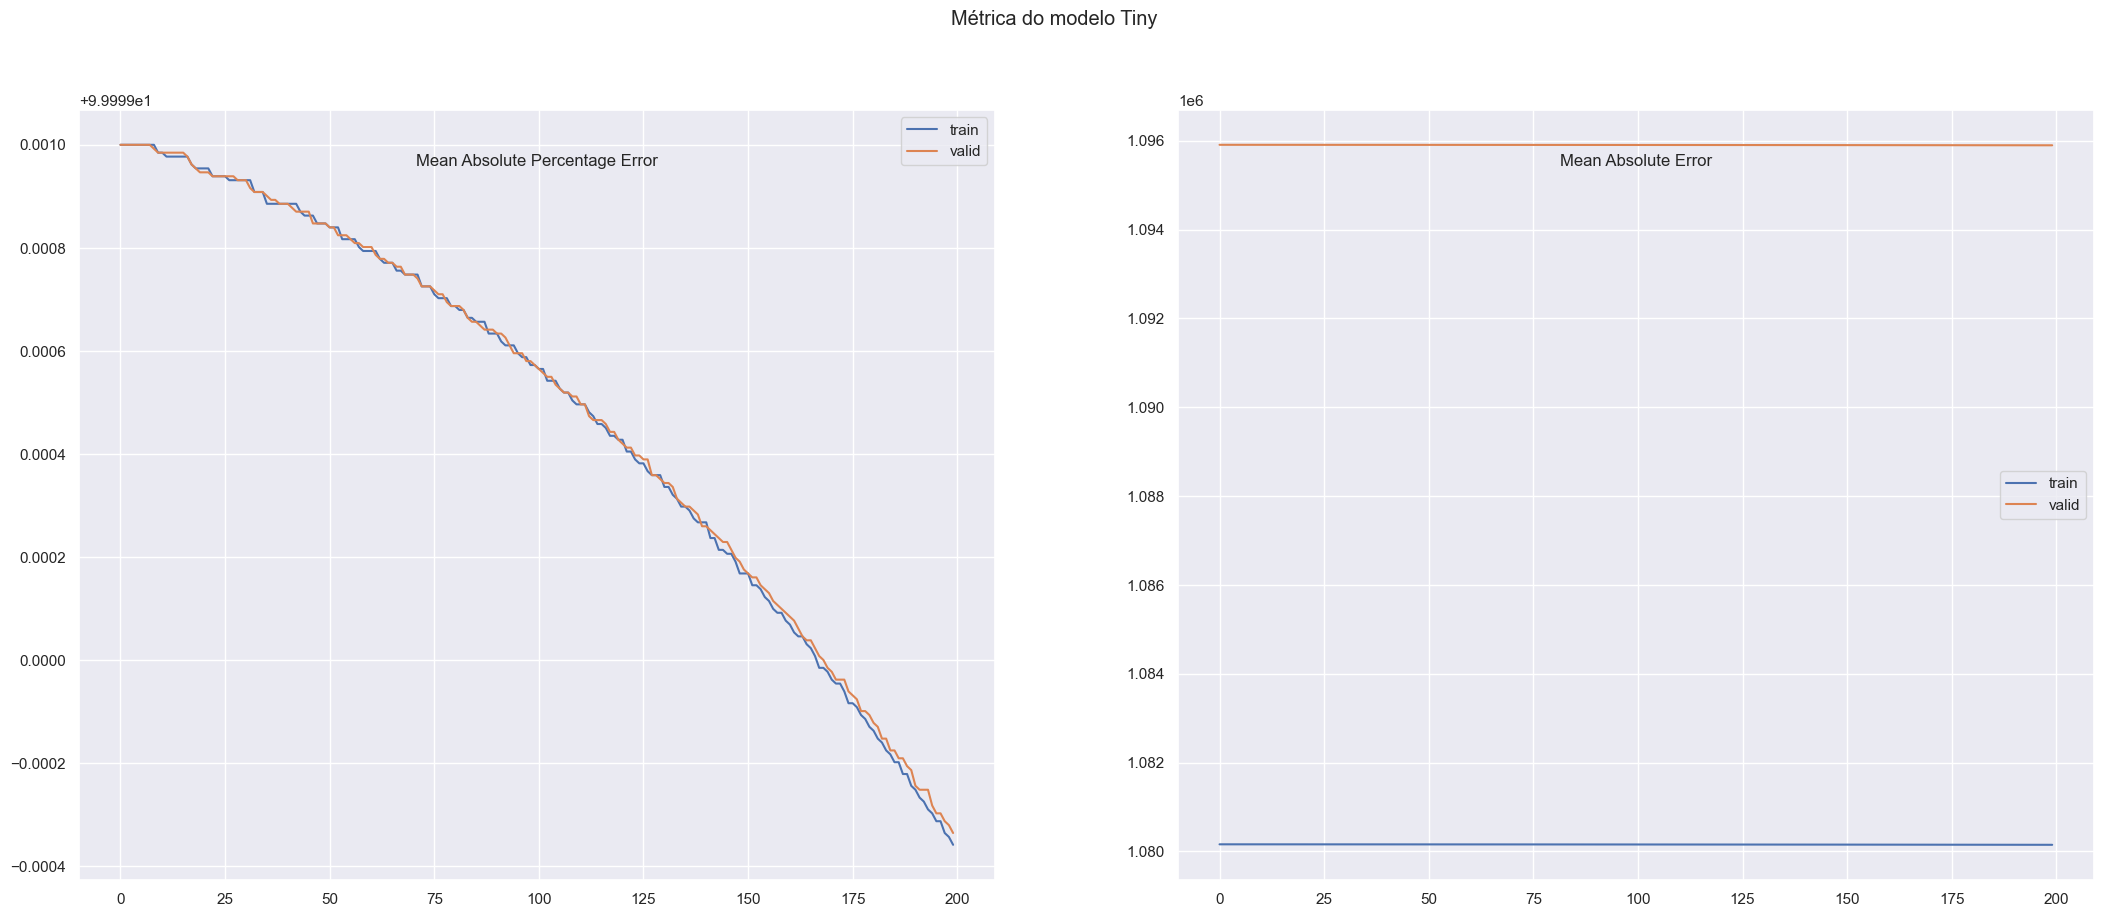

In [35]:
title_tiny = 'Métrica do modelo Tiny'
# Imprime os gráficos do MAPE e MAE (Loss e Metric, respectivamente)
plotHistory(history_tiny, title_tiny)

Podemos perceber que o erro médio absoluto, bem como o Loss, encontram-se bem longe do esperado. Na verdade, o modelo que criamos para resolver o problema é extremamente simples se comparado à complexidade do problema e foi, basicamente, massacrado.

 Para conseguirmos diminuir o loss e melhorarmos o erro médio absoluto, isto é, diminuir o Bias do nosso modelo, vamos aumentar o número de neurônios nas camadas ocultas, bem como o número de camadas ocultas.

 Além disso, iremos adicionar uma técnica de regularização da rede neural chamada de Dropout, que resulta na melhora da generalização do modelo, por meio do "desligamento" de parte dos nossos neurônios.

Por fim, como vamos aumentar a complexidade do nosso modelo, vamos utilizar a técnica de mini-batch, através do parâmetro batch_size = 32, para acelerar o processo de treinamento.

In [36]:
# Verificando o shape da nossa base de treinamento
train_x.shape

(10867, 336)

## Aumentando a complexidade do modelo

Como vamos aumentar a complexidade do nosso modelo, é possível que o mesmo sofra um fenômeno chamado de "Overfitting", que nada mais é que um modelo "bom demais" para a complexidade do problema, que acaba por "decorar" as informações contidas nos dados de treinamento ao invés de "aprender".

Para evitarmos esse tipo de problemas podemos utilizar uma técnica chamada de Dropout. O Dropout permite que uma parte dos neurônios de uma camada oculta parem de funcionar, compensando os valores das entradas nos demais neurônios de acordo com a porcentagem de neurônios que escolhermos para "desativar". Tal fenômeno acaba por deixar a rede "menos inteligente" e, portanto, ajuda na melhor generalização do modelo.

Um valor muito defendido na literatura para essa técnica é o de 20%, portanto, é exatamente esse valor que iremos utilizar no nosso modelo.

In [40]:
#model_large = tf.keras.models.Sequential()
model_large = Sequential()

model_large.add(Dense(512, input_dim=train_x.shape[1], activation='relu', kernel_initializer='he_uniform'))
model_large.add(Dropout(0.2))
model_large.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model_large.add(Dropout(0.2))
model_large.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model_large.add(Dropout(0.2))
model_large.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model_large.add(Dropout(0.2))
model_large.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model_large.add(Dropout(0.2))
model_large.add(Dense(1, activation='relu'))

In [41]:
model_large.compile(loss='mape', optimizer='adam', metrics=['mae'])

In [42]:
model_large.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               172544    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 512)              

Para esse caso, estamos utilizando uma rede neural com 5 camadas ocultas e 512 neurônios em cada camada. Para acelerar o processo de treinamento, iremos utilizar de uma técnica chamada de "Minibatch Gradient Descent" que acelera o processo de treinamento mas, dependendo do tamanho do batch, causará ruídos nos valores da loss function e MAE. 

Portanto, para esse modelo e o próximo, estaremos utilizando um valor bastante defendido na literatura e entre pesquisadores de 32 amostras.

In [43]:
history_large = model_large.fit(train_x, train_y,
                    validation_data=(valid_x, valid_y),
                    epochs=100, verbose=1, batch_size=32)

Epoch 1/100
340/340 [==============================] - 4s 10ms/step - loss: 37.1876 - mae: 442672.6562 - val_loss: 21.3072 - val_mae: 254136.1562
Epoch 2/100
340/340 [==============================] - 3s 8ms/step - loss: 19.9576 - mae: 243169.5469 - val_loss: 18.4241 - val_mae: 243137.2500
Epoch 3/100
340/340 [==============================] - 3s 8ms/step - loss: 18.7356 - mae: 226728.8438 - val_loss: 17.9034 - val_mae: 235312.4531
Epoch 4/100
340/340 [==============================] - 3s 8ms/step - loss: 18.2799 - mae: 221239.5000 - val_loss: 17.3629 - val_mae: 226683.0469
Epoch 5/100
340/340 [==============================] - 3s 8ms/step - loss: 17.9381 - mae: 215932.4062 - val_loss: 17.1773 - val_mae: 216064.1875
Epoch 6/100
340/340 [==============================] - 3s 8ms/step - loss: 17.5539 - mae: 211271.1250 - val_loss: 17.1898 - val_mae: 211697.9531
Epoch 7/100
340/340 [==============================] - 3s 8ms/step - loss: 17.3661 - mae: 208707.5938 - val_loss: 17.0178 - val_m

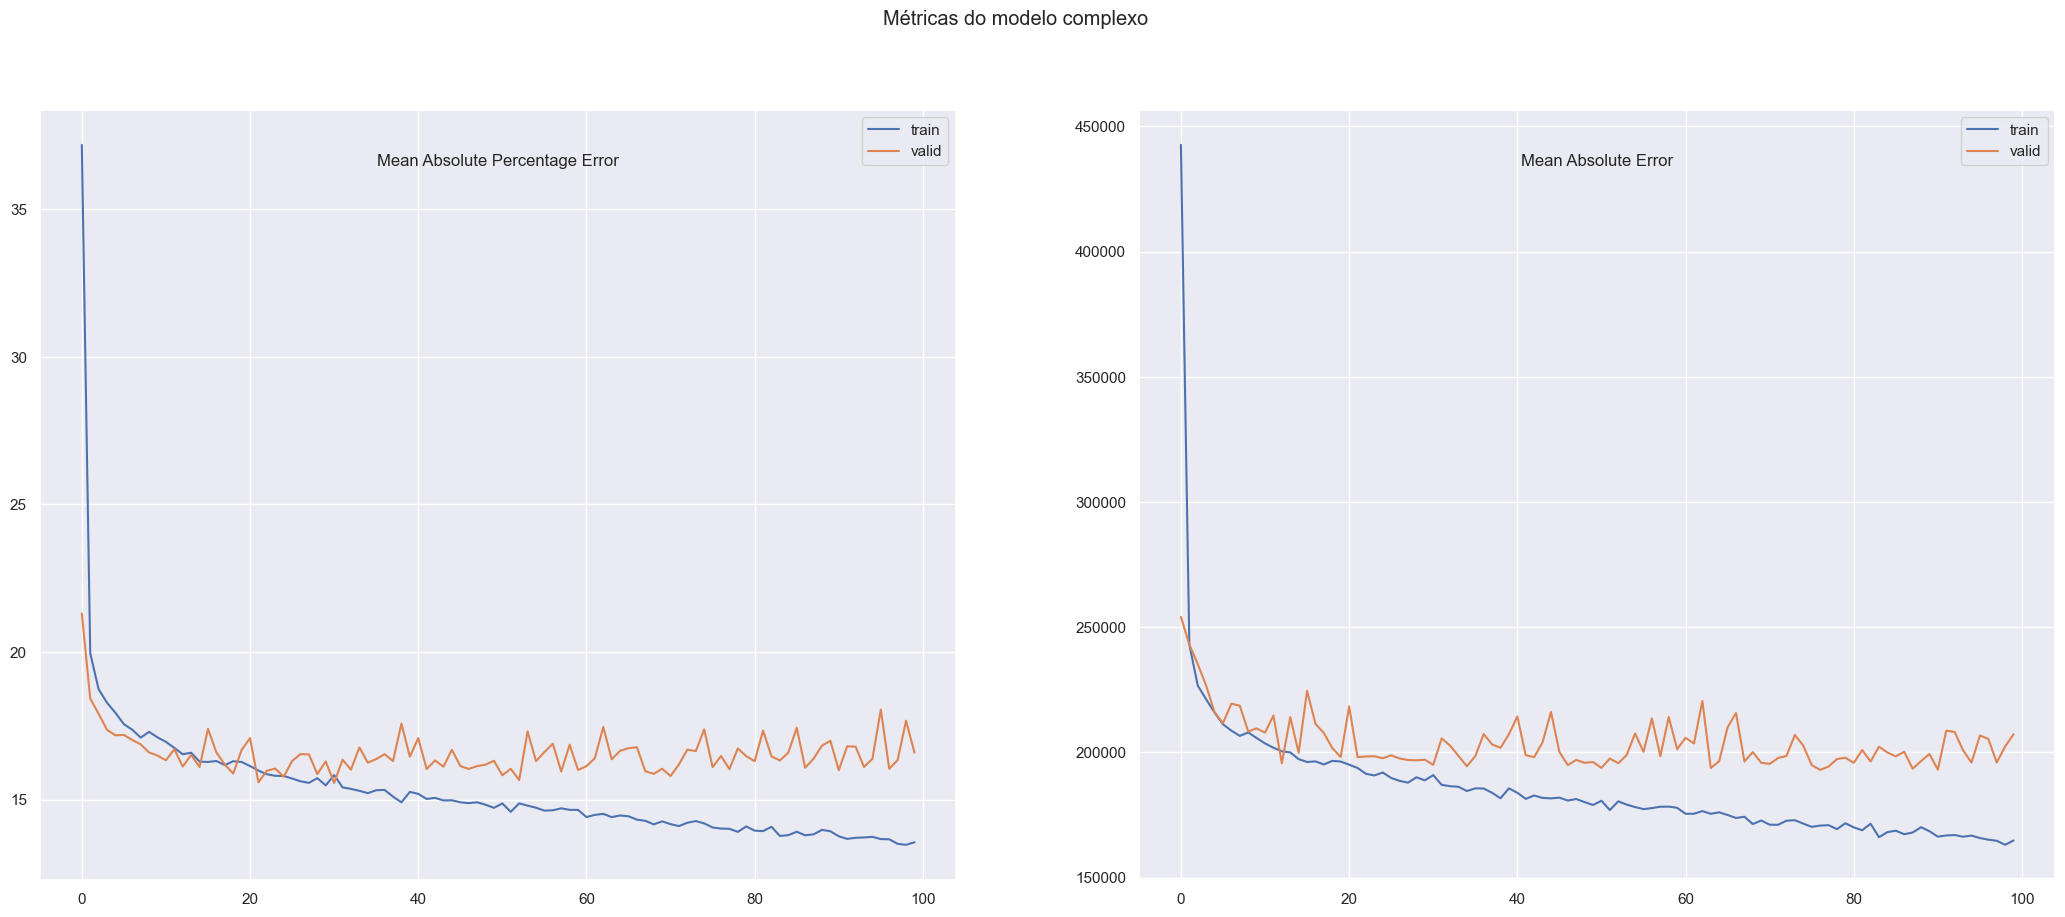

In [44]:
title_large = 'Métricas do modelo complexo'
plotHistory(history_large, title_large)

Mesmo utilizando todas essas técnicas para melhorar a nossa rede neural, não podemos concluir que esse é o melhor modelo de todos para esse problema.

Tivemos sim um ganho considerável ao aumentar a nossa rede neural, mas será que esse é o máximo que podemos alcançar? Para descobrir isso, teremos que ficar criando várias rede neurais manualmente até definir qual a melhor? Bem, no próximo tópico iremos discutir mais sobre essas perguntas.

In [57]:
history_tuned = model_tuned.fit(train_x, train_y, epochs = 100, validation_data = (valid_x, valid_y),
          batch_size=32, verbose=1)

Epoch 1/100
340/340 [==============================] - 4s 8ms/step - loss: 99.5935 - mae: 1087895.0444 - val_loss: 87.5878 - val_mae: 1021361.6875
Epoch 2/100
340/340 [==============================] - 2s 7ms/step - loss: 93.5981 - mae: 1046513.1076 - val_loss: 79.7817 - val_mae: 972077.0625
Epoch 3/100
340/340 [==============================] - 2s 7ms/step - loss: 80.1967 - mae: 944721.0942 - val_loss: 69.0147 - val_mae: 880960.1250
Epoch 4/100
340/340 [==============================] - 2s 7ms/step - loss: 63.7470 - mae: 840701.7854 - val_loss: 52.3361 - val_mae: 746587.0000
Epoch 5/100
340/340 [==============================] - 2s 7ms/step - loss: 48.7209 - mae: 690607.4377 - val_loss: 40.4095 - val_mae: 606531.6250
Epoch 6/100
340/340 [==============================] - 2s 7ms/step - loss: 37.8718 - mae: 571474.7100 - val_loss: 29.4615 - val_mae: 477608.1562
Epoch 7/100
340/340 [==============================] - 3s 7ms/step - loss: 30.6112 - mae: 471301.2469 - val_loss: 23.7421 - val

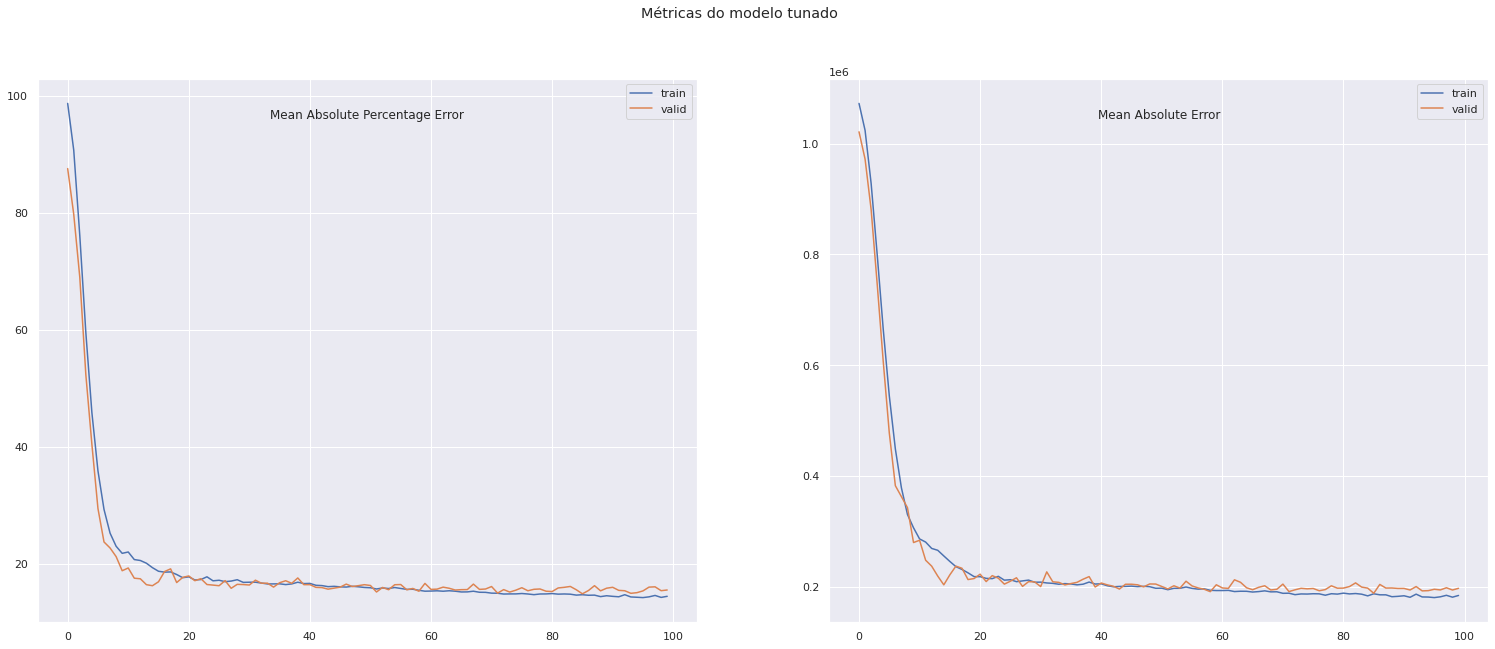

In [58]:
title_tuned = 'Métricas do modelo tunado'
plotHistory(history_tuned, title_tuned)

## Analisando os resultados

In [59]:
print("First Tiny Model:")
mape, mae = model_first.evaluate(x=test_x, y=test_y, batch_size=32, verbose=0)
print('Mean Absolute Percentage Error = {:.3f} \nMean Absolute Error = {:.3f}'.format(mape, mae))

First Tiny Model:
Mean Absolute Percentage Error = 100.000 
Mean Absolute Error = 1011479.188


In [60]:
print("Large Model:")
mape, mae = model_large.evaluate(x=test_x, y=test_y, batch_size=32, verbose=0)
print('Mean Absolute Percentage Error = {:.3f} \nMean Absolute Error = {:.3f}'.format(mape, mae))

Large Model:
Mean Absolute Percentage Error = 16.642 
Mean Absolute Error = 176527.297


In [61]:
print("Tuned Model:")
mape, mae = model_tuned.evaluate(x=test_x, y=test_y, batch_size=32, verbose=0)
print('Mean Absolute Percentage Error = {:.3f} \nMean Absolute Error = {:.3f}'.format(mape, mae))

Tuned Model:
Mean Absolute Percentage Error = 15.520 
Mean Absolute Error = 165066.469


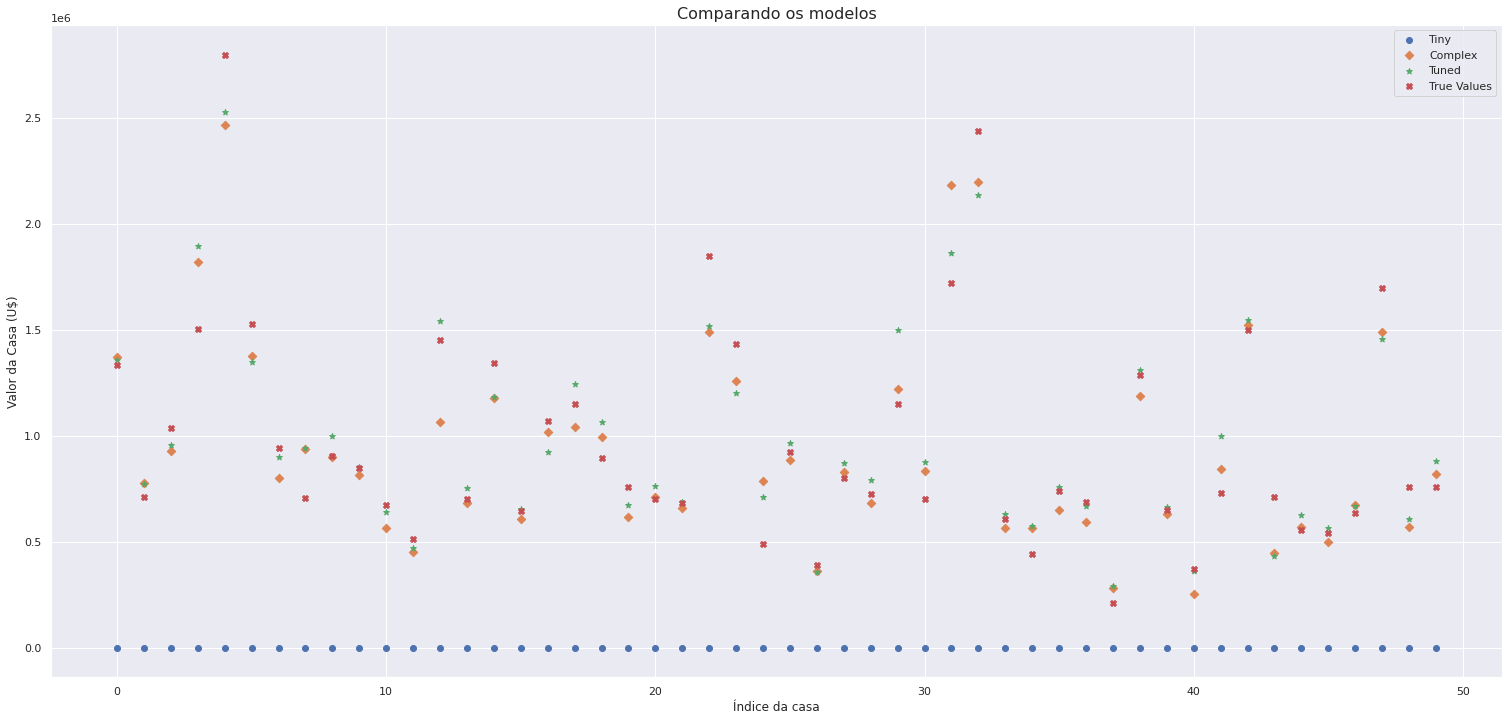

In [76]:
predictions_tiny = model_first.predict(test_x)
predictions_large = model_large.predict(test_x)
predictions_tuned = model_tuned.predict(test_x)

x_values = list(range(len(test_y[:50])))

plt.figure(figsize=(26,12))
plt.scatter(x_values, predictions_tiny[:50], label="Tiny")
plt.scatter(x_values, predictions_large[:50], marker="D",label="Complex")
plt.scatter(x_values, predictions_tuned[:50], marker="*",label="Tuned")
plt.scatter(x_values, test_y[:50], marker="X",label="True Values")
plt.legend(loc="best")
plt.title("Comparando os modelos", fontsize=16)
plt.xlabel("Índice da casa")
plt.ylabel("Valor da Casa (U$)")
plt.savefig("/content/gdrive/MyDrive/Engenharia Elétrica/Deep Learning/Comparando_modelos")
plt.show()